In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
import tensorflow as tf

from tensorflow.keras.optimizers import SGD

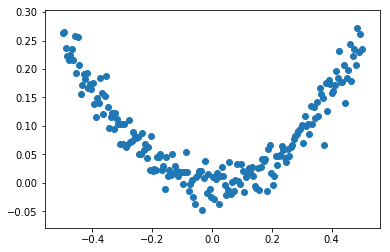

In [11]:
x_data = np.linspace(-0.5,0.5,200)
noise = np.random.normal(0,0.02,x_data.shape)

y_data = np.square(x_data)+noise

#显示样本点
plt.scatter(x_data , y_data)
plt.show()

0.026454953
0.0052777533
0.00310157
0.0014526166
0.00059750816
0.00047058775
0.0004582401
[[-0.42909878 -0.99121696 -0.15285817 -0.15224333 -0.00624301  0.1425058
   1.5910887  -0.60590166 -0.2311517   0.23090872]] [-0.00868253 -0.3505959   0.19302362  0.22304253 -0.03369689 -0.2865494
 -0.70243347 -0.08393295 -0.06150809 -0.0331449 ]


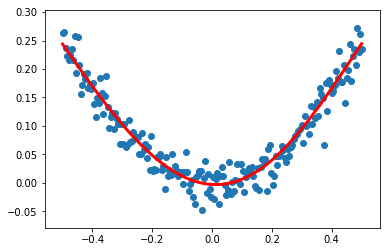

In [13]:
#创建一个顺序模型
model = Sequential()
# 在模型中添加一个全连接层
# 1-10-1
model.add(Dense(units = 10 , input_dim = 1))
model.add(Activation('tanh'))
model.add(Dense(units = 1))
model.add(Activation('tanh'))
# sgd:Stichastic gradient descent ,随机梯度下降法
# mse：Mean squared Error ，均方误差

#定义优化算法
sgd = SGD(learning_rate=0.3)

model.compile(optimizer = sgd,loss = 'mse')

#训练30001个批次
for step in range(3001):
    #每次训练一个批次
    cost = model.train_on_batch(x_data,y_data)
    
    if step % 500 == 0:
        print(cost)

#打印权值和偏置值
w,b = model.layers[0].get_weights()
print(w,b)

#x_data输入到网格中，得到预测值y_pred
y_pred = model.predict(x_data)

#显示样本点
plt.scatter(x_data , y_data)
plt.plot(x_data , y_pred , 'r' , lw =3)
plt.show()